In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

# przygotowanie placu

In [223]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.3f}'.format

In [304]:
movies = pd.read_csv(Path('..','res','data2','movies.csv'))
ratings = pd.read_csv(Path('..','res','data2','ratings.csv'))
users = pd.read_csv(Path('..','res','data2','users.csv'))

In [305]:
ratings['movie_id'] = ratings['movie_id'].apply(lambda x: x-1)
ratings['user_id'] = ratings['user_id'].apply(lambda x: x-1)

In [307]:
ratings[ratings['user_id'] == 100]

,user_id,movie_id,rating,timestamp
328,100,828,3,877136138
662,100,303,3,877135677
1344,100,595,3,877136564
1599,100,221,3,877136243
1741,100,470,3,877136535
...,...,...,...,...
81594,100,762,3,877136789
81856,100,830,3,877136954
87740,100,1027,3,877136449
87771,100,471,3,877136711


# Robienie cold-start usera

In [309]:
ratings_cs = ratings.copy()
# dla usera 100 jest 67 ocen
ratings_cs.loc[ratings_cs['user_id'] == 100, 'rating'] = 0
ratings_cs[ratings_cs['user_id']==100]
#ratings[ratings['user_id']==100]
ratings[ratings['user_id']==100]


,user_id,movie_id,rating,timestamp
328,100,828,3,877136138
662,100,303,3,877135677
1344,100,595,3,877136564
1599,100,221,3,877136243
1741,100,470,3,877136535
...,...,...,...,...
81594,100,762,3,877136789
81856,100,830,3,877136954
87740,100,1027,3,877136449
87771,100,471,3,877136711


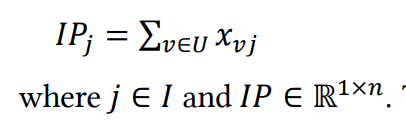

In [310]:
def HP(u, IP_vector_normalized, UIP):
        alpha = 0.5
        HP_u = alpha * IP_vector_normalized + (1-alpha) * UIP[u,:]
        return HP_u

In [311]:
def similarity(ratings_df):
    
    IP = ratings_df.groupby('movie_id')['rating'].sum().reset_index()
    IP_vector = IP['rating'].values.reshape(1,-1) #zamiana na odpowiedni kształt (1 wiersz, tyle kolumn ile wierszy ma kolumna rating)
    IP_vector_normalized = IP_vector / max(IP_vector[0])
    
    UP = ratings_df.groupby('user_id')['rating'].sum().reset_index()
    UP_vector = UP['rating'].values.reshape(-1,1)
    UP_vector_normalized = UP_vector / max(UP_vector[0])

    UIP = UP_vector_normalized / IP_vector_normalized
    
    list_for_rows = []
    for u in range(UP_vector.shape[0]):
        row = HP(u, IP_vector_normalized, UIP)
        list_for_rows.append(row)
    
    HP_matrix = np.vstack(list_for_rows)
    
    return(pd.DataFrame(HP_matrix))

In [323]:
def repeat(data):
    l = list()
    for i in range(100):
        pred = similarity(data).iloc[100,:].to_list()
        l.append(pred)
    return l

In [325]:
output = repeat(ratings_cs)

In [338]:
output[2] == output[3]

True

In [329]:
mm = np.vstack(output)

In [335]:
avg = np.mean(mm, axis = 0)
aaa = avg.reshape(1,-1)
aaa.shape

(1, 1682)

In [336]:
cosine_similarity(aaa, original_preferences)

array([[0.01400666]])

In [312]:
sim_matr_cs = similarity(ratings_cs)
sim_matr = similarity(ratings)

(1682,)

In [313]:
predicted_preferences = sim_matr_cs.iloc[100,:].values.reshape(1,-1)
original_preferences = sim_matr.iloc[100,:].values.reshape(1,-1)

In [315]:
predicted_preferences.shape, original_preferences.shape

((1, 1682), (1, 1682))

In [316]:
predicted_preferences - original_preferences

array([[  -0.1432276 ,   -0.59747662,   -0.91931057, ..., -125.49745355,
         -83.66496852,  -83.66496852]])

In [319]:
cosine_similarity(predicted_preferences, original_preferences), euclidean_distances(predicted_preferences, original_preferences)

(array([[0.01400666]]), array([[2185.45344886]]))

In [321]:
mean_squared_error(predicted_preferences, original_preferences)

2839.599748591648

In [322]:
np.dot(predicted_preferences, original_preferences)

ValueError: shapes (1,1682) and (1,1682) not aligned: 1682 (dim 1) != 1 (dim 0)

In [49]:
IP = ratings.groupby('movie_id')['rating'].sum().reset_index()
IP_vector = IP['rating'].values.reshape(1,-1) #zamiana na odpowiedni kształt (1 wiersz, tyle kolumn ile wierszy ma kolumna rating)

Text(0, 0.5, 'Liczba użytkowników')

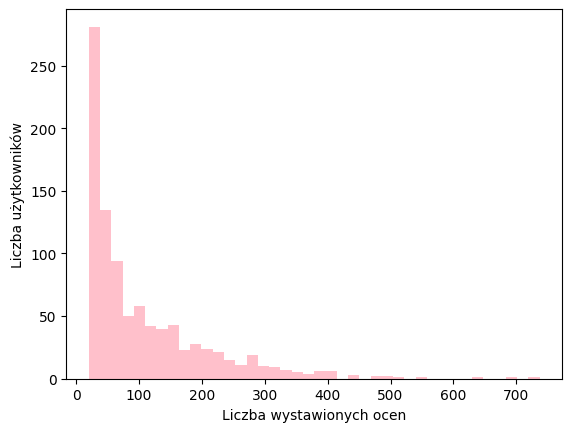

In [369]:
ile_razy_ocenil = ratings['user_id'].value_counts().values

plt.hist(ile_razy_ocenil, bins = 40, color = 'pink')
plt.xlabel("Liczba wystawionych ocen")
plt.ylabel("Liczba użytkowników")

In [368]:
pd.DataFrame(ratings['user_id'].value_counts())['count'].describe()

count   943.000
mean    106.045
std     100.932
min      20.000
25%      33.000
50%      65.000
75%     148.000
max     737.000
Name: count, dtype: float64

In [359]:
ile_razy_ocenil.shape

(943,)

In [167]:
pd.DataFrame(IP_vector)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,1753,420,273,742,284,93,1489,875,1165,341,...,3,4,3,2,3,1,3,2,3,3


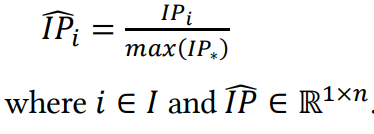

In [168]:
IP_vector_normalized = IP_vector / max(IP_vector[0])
pd.DataFrame(IP_vector_normalized)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.689886,0.165289,0.107438,0.292011,0.111767,0.0366,0.58599,0.344353,0.458481,0.134199,...,0.001181,0.001574,0.001181,0.000787,0.001181,0.000394,0.001181,0.000787,0.001181,0.001181


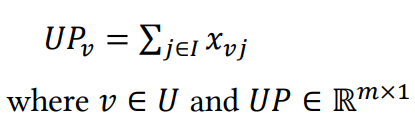

In [126]:
UP = ratings.groupby('user_id')['rating'].sum().reset_index()
UP_vector = UP['rating'].values.reshape(-1,1)

In [169]:
pd.DataFrame(UP_vector)

,0
0,982
1,230
2,151
3,104
4,503
...,...
938,209
939,370
940,89
941,337


In [127]:
UP_vector.shape

(943, 1)

In [170]:
UP_vector_normalized = UP_vector / max(UP_vector[0])
pd.DataFrame(UP_vector_normalized)

,0
0,1.000000
1,0.234216
2,0.153768
3,0.105906
4,0.512220
...,...
938,0.212831
939,0.376782
940,0.090631
941,0.343177


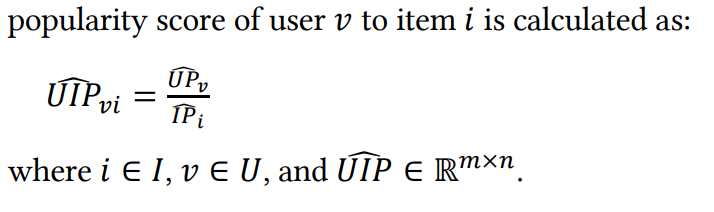

In [171]:
UIP = UP_vector_normalized / IP_vector_normalized
pd.DataFrame(UIP)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,1.449515,6.050000,9.307692,3.424528,8.947183,27.322581,1.706514,2.904000,2.181116,7.451613,...,847.000000,635.250000,847.000000,1270.500000,847.000000,2541.000000,847.000000,1270.500000,847.000000,847.000000
1,0.339499,1.417006,2.180009,0.802079,2.095572,6.399382,0.399693,0.680163,0.510852,1.745286,...,198.380855,148.785642,198.380855,297.571283,198.380855,595.142566,198.380855,297.571283,198.380855,198.380855
2,0.222889,0.930295,1.431224,0.526582,1.375789,4.201334,0.262407,0.446542,0.335385,1.145818,...,130.241344,97.681008,130.241344,195.362016,130.241344,390.724033,130.241344,195.362016,130.241344,130.241344
3,0.153513,0.640733,0.985743,0.362679,0.947563,2.893634,0.180731,0.307552,0.230994,0.789173,...,89.702648,67.276986,89.702648,134.553971,89.702648,269.107943,89.702648,134.553971,89.702648,89.702648
4,0.742471,3.098931,4.767586,1.754112,4.582926,13.995171,0.874111,1.487487,1.117211,3.816865,...,433.850305,325.387729,433.850305,650.775458,433.850305,1301.550916,433.850305,650.775458,433.850305,433.850305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.308502,1.287627,1.980965,0.728846,1.904238,5.815091,0.363199,0.618061,0.464209,1.585934,...,180.267821,135.200866,180.267821,270.401731,180.267821,540.803462,180.267821,270.401731,180.267821,180.267821
939,0.546151,2.279532,3.506972,1.290301,3.371138,10.294659,0.642984,1.094175,0.821805,2.807634,...,319.134420,239.350815,319.134420,478.701629,319.134420,957.403259,319.134420,478.701629,319.134420,319.134420
940,0.131372,0.548320,0.843569,0.310370,0.810895,2.476283,0.154664,0.263193,0.197678,0.675350,...,76.764766,57.573574,76.764766,115.147149,76.764766,230.294297,76.764766,115.147149,76.764766,76.764766
941,0.497441,2.076222,3.194188,1.175220,3.070469,9.376486,0.585637,0.996587,0.748509,2.557224,...,290.671079,218.003310,290.671079,436.006619,290.671079,872.013238,290.671079,436.006619,290.671079,290.671079


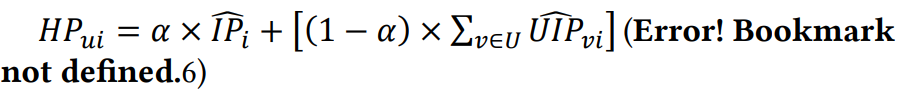

In [172]:
alpha = 0.5

def HP(u):
    HP_u = alpha * IP_vector_normalized + (1-alpha) * UIP[u,:]
    return HP_u

list_for_rows = []
for u in range(UP_vector.shape[0]):
    row = HP(u)
    list_for_rows.append(row)

In [175]:
list_for_rows[0].shape

(1, 1682)

In [176]:
HP = np.vstack(list_for_rows)

In [177]:
pd.DataFrame(HP)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,1.069700,3.107645,4.707565,1.858270,4.529475,13.679590,1.146252,1.624176,1.319798,3.792906,...,423.500590,317.625787,423.500590,635.250394,423.500590,1270.500197,423.500590,635.250394,423.500590,423.500590
1,0.514693,0.791148,1.143724,0.547045,1.103670,3.217991,0.492841,0.512258,0.484666,0.939743,...,99.191018,74.393608,99.191018,148.786035,99.191018,297.571480,99.191018,148.786035,99.191018,99.191018
2,0.456387,0.547792,0.769331,0.409297,0.743778,2.118967,0.424198,0.395447,0.396933,0.640009,...,65.121262,48.841291,65.121262,97.681402,65.121262,195.362213,65.121262,97.681402,65.121262,65.121262
3,0.421699,0.403011,0.546591,0.327345,0.529665,1.465117,0.383360,0.325952,0.344737,0.461686,...,44.851914,33.639280,44.851914,67.277379,44.851914,134.554168,44.851914,67.277379,44.851914,44.851914
4,0.716178,1.632110,2.437512,1.023061,2.347346,7.015885,0.730050,0.915920,0.787846,1.975532,...,216.925743,162.694652,216.925743,325.388123,216.925743,650.775655,216.925743,325.388123,216.925743,216.925743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.499194,0.726458,1.044202,0.510428,1.008002,2.925845,0.474594,0.481207,0.461345,0.860067,...,90.134501,67.601220,90.134501,135.201259,90.134501,270.401928,90.134501,135.201259,90.134501,90.134501
939,0.618019,1.222410,1.807205,0.791156,1.741453,5.165629,0.614487,0.719264,0.640143,1.470917,...,159.567800,119.676194,159.567800,239.351208,159.567800,478.701826,159.567800,239.351208,159.567800,159.567800
940,0.410629,0.356805,0.475503,0.301190,0.461331,1.256441,0.370327,0.303773,0.328079,0.404774,...,38.382973,28.787574,38.382973,57.573968,38.382973,115.147345,38.382973,57.573968,38.382973,38.382973
941,0.593663,1.120756,1.650813,0.733616,1.591118,4.706543,0.585813,0.670470,0.603495,1.345711,...,145.336130,109.002442,145.336130,218.003703,145.336130,436.006816,145.336130,218.003703,145.336130,145.336130
